In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [2]:
def read_data(dataset_similarity, dataset_distance):
    similarity = [[],[],[],[],[],[],[],[]]
    with open(dataset_similarity) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        i = 0
        for row in csv_reader:
            i += 1
            if i == 16:
                similarity[0] = row
            if i == 32:
                similarity[1] = row
            if i == 50:
                similarity[2] = row
            if i == 14:
                similarity[3] = row
                
    with open(dataset_distance) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        i = 0
        for row in csv_reader:
            i += 1
            if i == 3:
                similarity[4] = row
            if i == 17:
                similarity[5] = row
            if i == 2:
                similarity[6] = row
            if i == 16:
                similarity[7] = row

    for i in range(len(similarity)):
#         print(similarity[i])
        old_row = similarity[i][1:]
        new_row = []
        for v in old_row:
            v = v.split(' ')
#             print(v)
            new_row.append(float(v[0]))
#         print(new_row)
        similarity[i] = new_row
#         print(similarity[i])
    return similarity

def data_preprocess(similarity):
    names = ['Cosine', 'Fager', 'Disperson', 'Inner Product', 'Euclidean', 'Chord', 'Hamming', 'Hellinger']
    new_similarity = [[], [], [], [], [], [], [], []]
    for i in range(len(similarity)):
#         print(names[i])
        s = similarity[i]
#         print(s)
        norm_s = preprocessing.normalize(np.array([s]))[0]
#         print(norm_s)
        if i == 1:
#             print('Negative')
            min_val = min(norm_s)
            abs_min = abs(min_val)
#             print(min_val)
#             print(abs_min)
            new_norm_s = [abs_min + x for x in norm_s]
            new_similarity[i] = new_norm_s
#             print(new_norm_s)
        elif i in [4, 5, 6, 7]:
#             print("Distance")
            new_norm_s = [1-x for x in norm_s]
            new_similarity[i] = new_norm_s
#             print(new_norm_s)
        else:
            new_similarity[i] = norm_s
#     for i in range(len(new_similarity)):
#         print(names[i])
#         print(similarity[i])
#         print(new_similarity[i])
    return new_similarity

# def set_decimal(similarity, d_num):
#     for s in similarity:
#         print(s)
#         for i in range(len(s)):
#             s[i] = round(s[i], 3)
#         print(s)

In [3]:
# datasets = ['Adult Conditional Drift', 'Adult Marginal Majority', 'Adult Marginal Minority',
#             'Bank Conditional Drift', 'Bank Marginal Majority', 'Bank Marginal Minority',
#             'Chess Conditional Drift', 'Chess Marginal Majority', 'Chess Marginal Minority',
#             'Diamonds Conditional Drift', 'Diamonds Marginal Majority', 'Diamonds Marginal Minority']

# datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Similarity.csv']

# datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Distance.csv']

# datasets = ['Adult Conditional Drift', 'Adult Marginal Drift Majority', 'Adult Marginal Drift Minority',
#             'Bank Conditional Drift', 'Bank Marginal Drift Majority', 'Bank Marginal Drift Minority',
#             'Chess Conditional Drift', 'Chess Marginal Drift Majority', 'Chess Marginal Drift Minority',
#             'Credit Conditional Drift', 'Credit Marginal Drift Majority', 'Credit Marginal Drift Minority',
#             'Diamonds Conditional Drift', 'Diamonds Marginal Drift Majority', 'Diamonds Marginal Drift Minority']

# datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Similarity.csv']

# datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Distance.csv']

# datasets = ['Adult Conditional Drift', 'Adult Marginal Drift Majority', 'Adult Marginal Drift Minority',
#             'Bank Conditional Drift', 'Bank Marginal Drift Majority', 'Bank Marginal Drift Minority',
#             'Cardio Conditional Drift', 'Cardio Marginal Drift Majority', 'Cardio Marginal Drift Minority',
#             'Chess Conditional Drift', 'Chess Marginal Drift Majority', 'Chess Marginal Drift Minority',
#             'Credit Conditional Drift', 'Credit Marginal Drift Majority', 'Credit Marginal Drift Minority',
#             'Diamonds Conditional Drift', 'Diamonds Marginal Drift Majority', 'Diamonds Marginal Drift Minority']

# datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Similarity.csv']

# datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Distance.csv']

datasets = ['Adult Conditional Drift', 'Adult Marginal Drift Majority', 'Adult Marginal Drift Minority',
            'Bank Conditional Drift', 'Bank Marginal Drift Majority', 'Bank Marginal Drift Minority',
            'Cardio Conditional Drift', 'Cardio Marginal Drift Majority', 'Cardio Marginal Drift Minority',
            'Chess Conditional Drift', 'Chess Marginal Drift Majority', 'Chess Marginal Drift Minority',
            'Credit Conditional Drift', 'Credit Marginal Drift Majority', 'Credit Marginal Drift Minority',
            'Diamonds Conditional Drift', 'Diamonds Marginal Drift Majority', 'Diamonds Marginal Drift Minority',
            'Gamma Conditional Drift', 'Gamma Marginal Drift Majority', 'Gamma Marginal Drift Minority',
            'Poker Conditional Drift', 'Poker Marginal Drift Majority', 'Poker Marginal Drift Minority']


datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_Gamma_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_Gamma_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_Gamma_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Reverse_PokerPart_Similarity.csv', 
                       'MTV_Evaluation/Evaluation_MTV/Feature_0_PokerPart_Similarity.csv',
                       'MTV_Evaluation/Evaluation_MTV/Feature_1_PokerPart_Similarity.csv']

datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_Gamma_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_Gamma_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_Gamma_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Reverse_PokerPart_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_0_PokerPart_Distance.csv',
                     'MTV_Evaluation/Evaluation_MTV/Feature_1_PokerPart_Distance.csv']

# datasets = ['Adult Conditional Drift', 'Adult Marginal Drift Majority', 'Adult Marginal Drift Minority',
#             'Bank Conditional Drift', 'Bank Marginal Drift Majority', 'Bank Marginal Drift Minority',
#             'Cardio Conditional Drift', 'Cardio Marginal Drift Majority', 'Cardio Marginal Drift Minority',
#             'Chess Conditional Drift', 'Chess Marginal Drift Majority', 'Chess Marginal Drift Minority']



# datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Similarity.csv']

# datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Adult_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Bank_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Cardio_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Chess_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Chess_Distance.csv']

# datasets = ['Credit Conditional Drift', 'Credit Marginal Drift Majority', 'Credit Marginal Drift Minority',
#             'Diamonds Conditional Drift', 'Diamonds Marginal Drift Majority', 'Diamonds Marginal Drift Minority',
#             'Gamma Conditional Drift', 'Gamma Marginal Drift Majority', 'Gamma Marginal Drift Minority',
#             'Poker Conditional Drift', 'Poker Marginal Drift Majority', 'Poker Marginal Drift Minority']


# datasets_similarity = ['MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_Gamma_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_Gamma_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_Gamma_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Reverse_PokerPart_Similarity.csv', 
#                        'MTV_Evaluation/Evaluation_MTV/Feature_0_PokerPart_Similarity.csv',
#                        'MTV_Evaluation/Evaluation_MTV/Feature_1_PokerPart_Similarity.csv']

# datasets_distance = ['MTV_Evaluation/Evaluation_MTV/Reverse_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Credit_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Diamonds_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_Gamma_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_Gamma_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_Gamma_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Reverse_PokerPart_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_0_PokerPart_Distance.csv',
#                      'MTV_Evaluation/Evaluation_MTV/Feature_1_PokerPart_Distance.csv']

0
0
0
0
0
0
1
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3


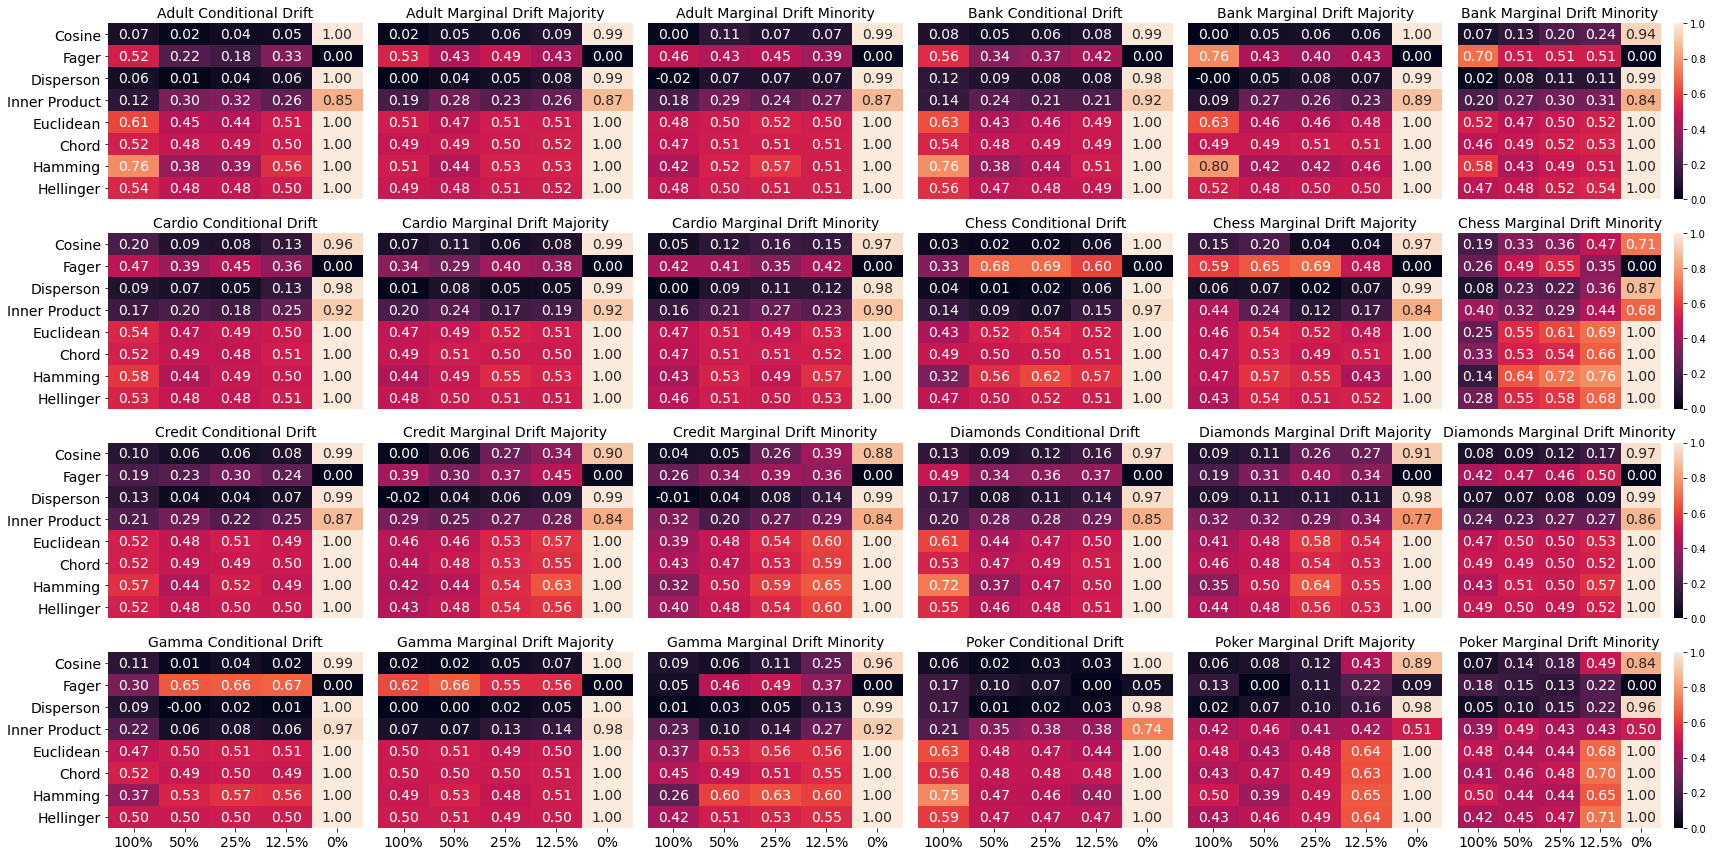

In [17]:
drift_severities = ['100%', '50%', '25%', '12.5%', '0%']
similarity_measures = ['Cosine', 'Fager', 'Disperson', 'Inner Product', 'Euclidean', 'Chord', 'Hamming', 'Hellinger']
# similarity_measures = ['Cos', 'Fag', 'Dis', 'Inn', 'Euc', 'Cho', 'Ham', 'Hel']

fig, axs = plt.subplots(4, 6, figsize=(24, 12))



for i in range(len(datasets_similarity)):
    dataset_similarity = datasets_similarity[i]
    dataset_distance = datasets_distance[i]
    similarity = read_data(dataset_similarity, dataset_distance)
    similarity = data_preprocess(similarity)
#     similarity = set_decimal(similarity, 3)
    df = pd.DataFrame(similarity, columns = drift_severities)

    
# #     print(similarity)
    row = int(i / 6)
    col = i % 6
# #     print(row)
# #     print(col)
    print(row)
    axs[row][col].set_title(datasets[i], fontsize=14)
    if row == 3:
        if col == 0:
            h = sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, yticklabels=similarity_measures, ax=axs[row][col])
            h.set_yticklabels(similarity_measures, fontsize = 14)
            h.set_xticklabels(drift_severities, fontsize = 14)
        elif col == 5:
            h = sns.heatmap(df, annot=True, cbar=True, fmt='.2f', annot_kws={"size": 14},  yticklabels=False, ax=axs[row][col])
            h.set_xticklabels(drift_severities, fontsize = 14)
        else:
            h = sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, yticklabels=False, ax=axs[row][col])
            h.set_xticklabels(drift_severities, fontsize = 14)
#         if col == 1:
#             h = sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, yticklabels=False, ax=axs[row][col])
#             h.set_xticklabels(drift_severities, fontsize = 14)
#         if col == 5:
#             h = sns.heatmap(df, annot=True, cbar=True, fmt='.2f', annot_kws={"size": 14},  yticklabels=False, ax=axs[row][col])
#             h.set_xticklabels(drift_severities, fontsize = 14)
    else:
        if col == 0:
            h = sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, xticklabels=False, yticklabels=similarity_measures, ax=axs[row][col])
            h.set_yticklabels(similarity_measures, fontsize = 14)
        elif col == 5:
            sns.heatmap(df, annot=True, cbar=True, fmt='.2f', annot_kws={"size": 14}, xticklabels=False, yticklabels=False, ax=axs[row][col])
        else:
            sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, xticklabels=False, yticklabels=False, ax=axs[row][col])
#         if col == 1:
#             sns.heatmap(df, annot=True, cbar=False, fmt='.2f', annot_kws={"size": 14}, xticklabels=False, yticklabels=False, ax=axs[row][col])
#         if col == 5:
#             sns.heatmap(df, annot=True, cbar=True, fmt='.2f', annot_kws={"size": 14}, xticklabels=False, yticklabels=False, ax=axs[row][col])

fig.tight_layout()
plt.show()
fig.savefig('TDM_Heatmap_New.pdf')

In [ ]:
?sns.heatmap

In [ ]:
sns.set()

drift_severities = [100, 50, 25, 12.5, 0]
similarity_measures = ['Cosine', 'Fager', 'Dispersion', 'Euclidean', 'Chord']

fig, axs = plt.subplots(6, 3, figsize=(15, 24))


for i in range(len(datasets_similarity)):
    dataset_similarity = datasets_similarity[i]
    dataset_distance = datasets_distance[i]
    similarity = read_data(dataset_similarity, dataset_distance)
    similarity = data_preprocess(similarity)
    similarity = np.array(similarity)
#     print(similarity)
    row = int(i / 3)
    col = i % 3
#     print(row)
#     print(col)
    
    axs[row][col].set_title(datasets[i])
    markers = ['o', 'p', '+', 'x', '*']
    for j in range(len(similarity)):
#         print("Similarity Measure: " + similarity_measures[j])
        axs[row][col].plot(similarity[j], drift_severities, label=similarity_measures[j], marker=markers[j])
#     im, cbar = heatmap(similarity, similarity_measures, drift_severities, ax=axs[row][col], cmap="YlGn", cbarlabel="Similarity Measurements")
#     texts = annotate_heatmap(im, valfmt="{x:.4f}")
    axs[row][col].legend()
fig.tight_layout()
plt.show()
fig.savefig('MDM_LineCharts.pdf')